In [1]:
import cv2
import time
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
protoFile = "pose_deploy.prototxt"
weightsFile = "pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [3]:
%%time
frame = cv2.imread("right.png")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.1

t = time.time()
# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()

CPU times: user 3.73 s, sys: 80.4 ms, total: 3.81 s
Wall time: 584 ms


In [41]:
import cv2 
import numpy as np 
  
# Creating a VideoCapture object to read the video 
cap = cv2.VideoCapture('hand_test.mp4') 
  
print(cap.isOpened())
# Loop untill the end of the video 
while (cap.isOpened()): 
    # Capture frame-by-frame 
    ret, frame = cap.read() 
    frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0, 
                         interpolation = cv2.INTER_CUBIC) 
  
    # Display the resulting frame 
    cv2.imshow('Frame', frame) 
  
    # using cv2.Gaussianblur() method to blur the video 
  
    # (5, 5) is the kernel size for blurring. 
    gaussianblur = cv2.GaussianBlur(frame, (5, 5), 0)  
    cv2.imshow('gblur', gaussianblur) 
  
    # define q as the exit button 
    if cv2.waitKey(25) & 0xFF == ord('q'): 
        break
  
# release the video capture object 
cap.release() 
  
# Closes all the windows currently opened. 
cv2.destroyAllWindows() 

True


error: OpenCV(4.4.0) ..\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [5]:
# cap = cv2.VideoCapture('hand.mp4')
cap = cv2.VideoCapture("hand_test.mp4")
out = cv2.VideoWriter('output.mp4', -1, 20.0, (640,480))
# cap = cv2.imread("right.png")
# def get_vid_properties(): 
#     width = int(cap.get(3))  # float
#     height = int(cap.get(4)) # float
#     cap.release()
#     return width,height

# print('Video Dimensions: ',get_vid_properties())
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
print(cap.isOpened())
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:

#     cv2.imshow('Frame',frame)

        frameCopy = np.copy(frame)
        frameWidth = frame.shape[1]
        frameHeight = frame.shape[0]
        print(frameWidth,frameHeight)
        aspect_ratio = frameWidth/frameHeight
        threshold = 0.1

        t = time.time()
        # input image dimensions for the network
        inHeight = 368
        inWidth = int(((aspect_ratio*inHeight)*8)//8)
        inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                                  (0, 0, 0), swapRB=False, crop=False)
        
        net.setInput(inpBlob)

        points = []
        output = net.forward()
        for i in [13, 14]:
    # confidence map of corresponding body's part.
            probMap = output[0, i, :, :]
            probMap = cv2.resize(probMap, (frameWidth, frameHeight))
        #     print(cv2.minMaxLoc(probMap))
            # Find global maxima of the probMap.
            minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

            if prob > threshold :
        #         cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 255, 255), thickness=4, lineType=cv2.FILLED)
        #         cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

                # Add the point to the list if the probability is greater than the threshold
                points.append((int(point[0]), int(point[1])))
        #         plt.figure(figsize=[14,10])
        #         plt.imshow(frameCopy)

            else :
                points.append(None)
        print(points)
        cv2.circle(frameCopy, (int((points[0][0]+points[1][0])/2), int((points[1][1]+points[0][1])/2)), 8, (0, 255, 255), thickness=4, lineType=cv2.FILLED)        
        cv2.imshow('Frame',frameCopy)
#         cap.set(cv2.cv.CV_CAP_PROP_POS_AVI_RATIO, 0)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

  # Break the loop

cap.release()
out.release()
cv2.destroyAllWindows()
  


True
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260
[(130, 132), (130, 93)]
194 260


KeyboardInterrupt: 

[[0.00126336 0.00073994 0.00050987 ... 0.00048839 0.0004928  0.00050688]
 [0.0009798  0.00049656 0.00049163 ... 0.00048912 0.00048394 0.00049943]
 [0.00049084 0.0004885  0.0004937  ... 0.00050406 0.00098111 0.00048589]
 ...
 [0.00051745 0.0005002  0.00051668 ... 0.00047293 0.00046371 0.00050508]
 [0.00072872 0.00055157 0.00050966 ... 0.00044895 0.00044876 0.0005182 ]
 [0.00121973 0.00058284 0.00054715 ... 0.00048773 0.00049787 0.00058252]]
[[0.00083918 0.00050694 0.00035808 ... 0.00034058 0.00034424 0.00035299]
 [0.00064117 0.00034142 0.000336   ... 0.00033397 0.00033419 0.00035011]
 [0.00033671 0.0003327  0.00033367 ... 0.00033968 0.00063852 0.00033341]
 ...
 [0.00035846 0.00034385 0.00035951 ... 0.00032501 0.00031667 0.00034765]
 [0.00049764 0.00037632 0.00035261 ... 0.00031295 0.00031149 0.00037235]
 [0.00080938 0.00040423 0.0003802  ... 0.00035167 0.00036429 0.00053662]]
[[0.00047381 0.00044708 0.00042976 ... 0.00040043 0.000401   0.00040879]
 [0.00038726 0.0003893  0.00037682 ... 

[[-1.3667950e-04 -1.7318875e-04 -1.8661801e-04 ... -2.0452432e-04
  -1.9037561e-04 -1.7676374e-04]
 [-2.0792842e-04 -1.9761495e-04 -2.0104210e-04 ... -2.2199401e-04
  -2.0287943e-04 -1.8881739e-04]
 [-2.1009822e-04 -2.1107204e-04 -2.0672975e-04 ... -2.1548185e-04
  -2.1920580e-04 -2.0759902e-04]
 ...
 [-1.8366787e-04 -1.9370776e-04 -1.7906830e-04 ... -2.5325664e-04
  -2.5187340e-04 -2.1589798e-04]
 [-1.5739840e-04 -1.8399803e-04 -1.8189335e-04 ... -2.6198110e-04
  -2.5506504e-04 -1.7498981e-04]
 [-1.0866887e-04 -1.2265821e-04 -1.2879487e-04 ... -2.0431745e-04
  -1.7806141e-04 -8.8326138e-05]]
[[-0.00020214 -0.00024637 -0.00025399 ... -0.00027249 -0.0002574
  -0.00023682]
 [-0.00025102 -0.00025169 -0.00025189 ... -0.00027473 -0.00026395
  -0.00025712]
 [-0.00026494 -0.00026094 -0.0002488  ... -0.00025322 -0.00026319
  -0.00026366]
 ...
 [-0.00024293 -0.00024635 -0.00023641 ... -0.00031805 -0.00031414
  -0.0002705 ]
 [-0.00022119 -0.00023459 -0.00023637 ... -0.00034395 -0.00033329
  -0.0

/home/young/anaconda3/envs/ar/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


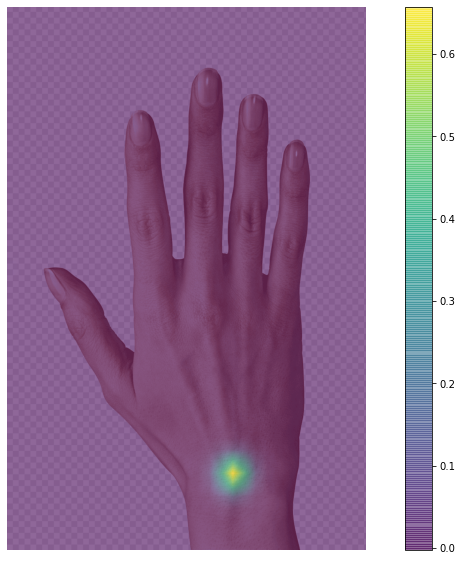

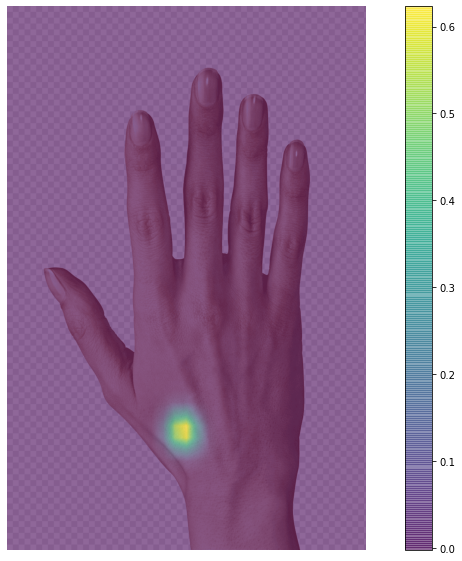

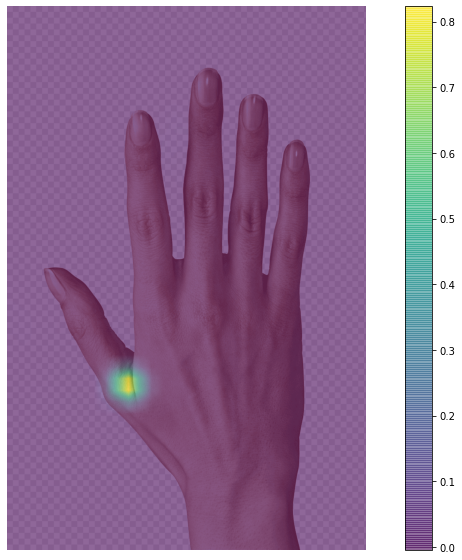

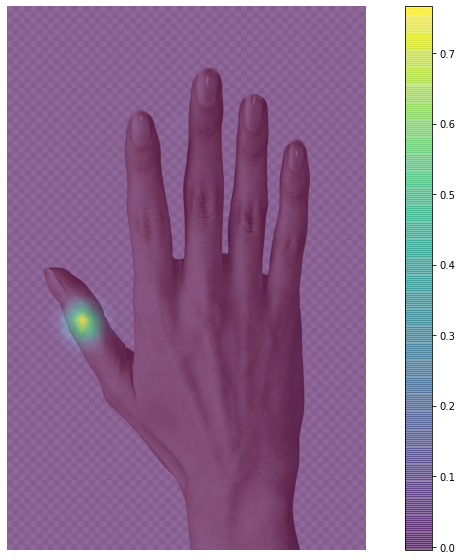

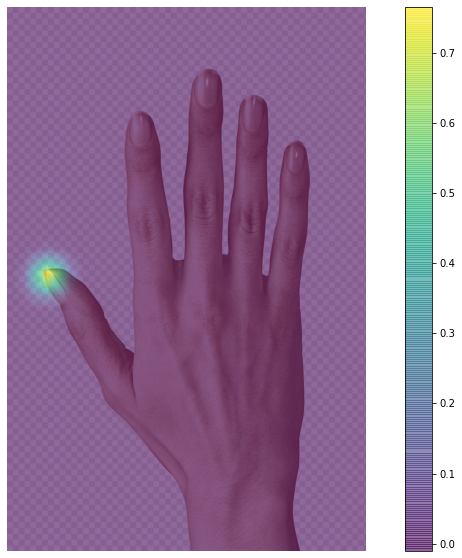

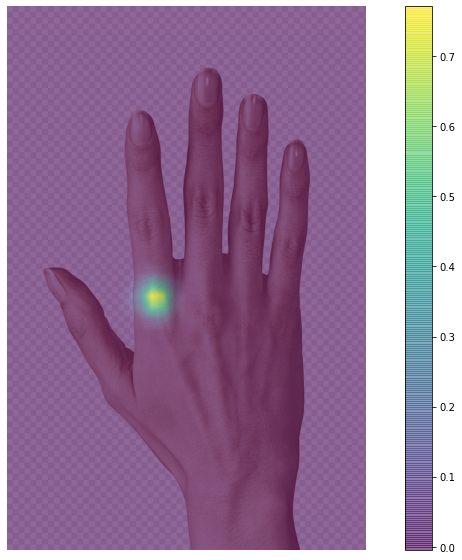

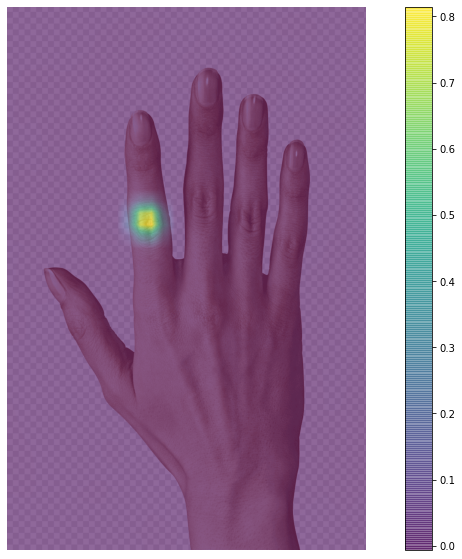

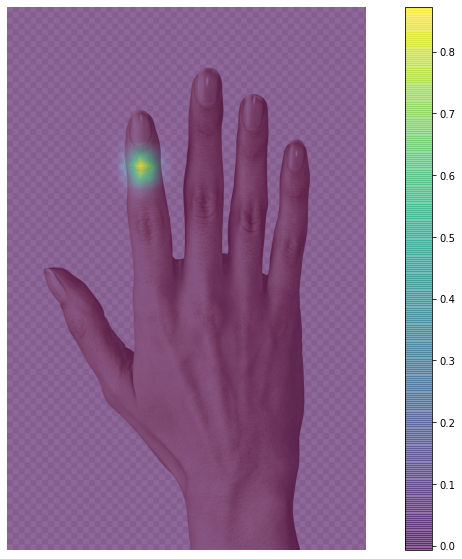

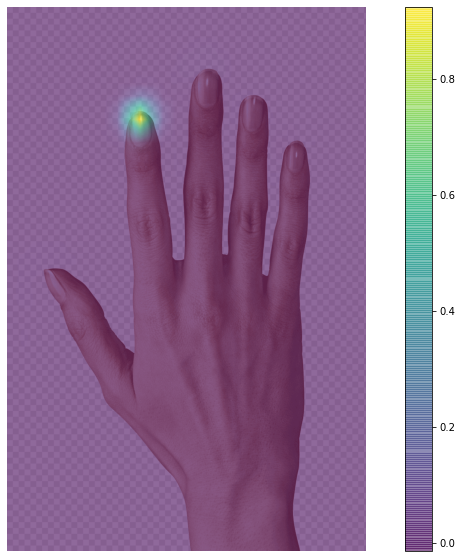

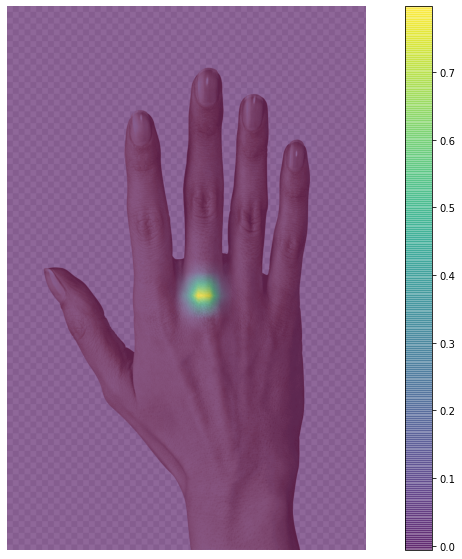

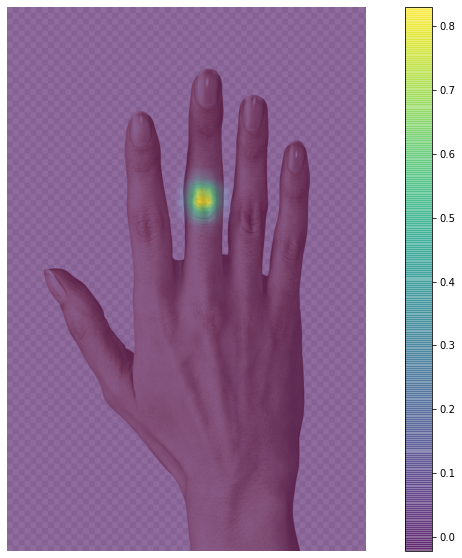

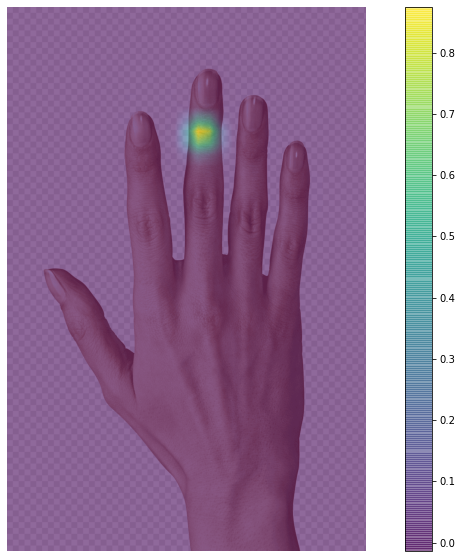

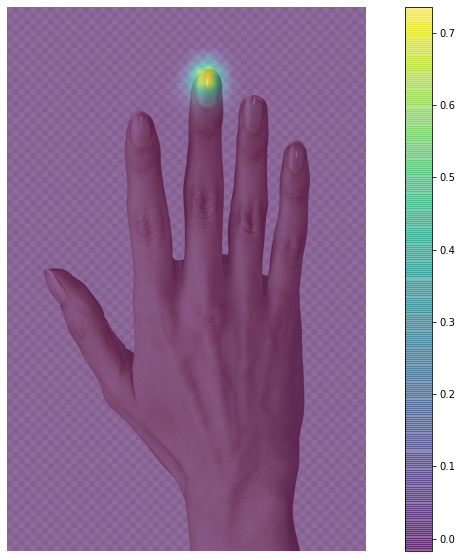

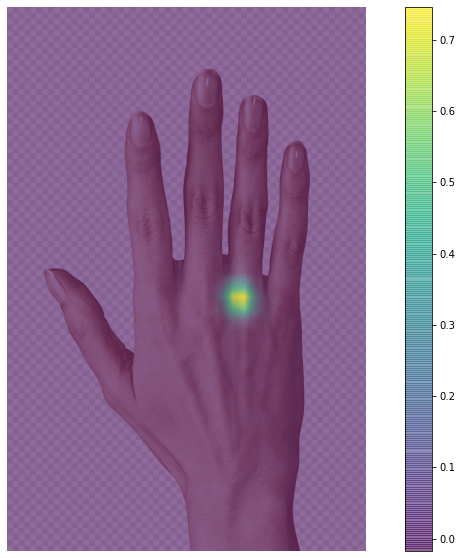

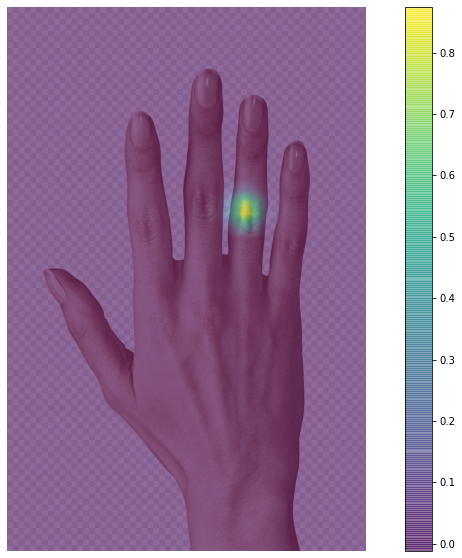

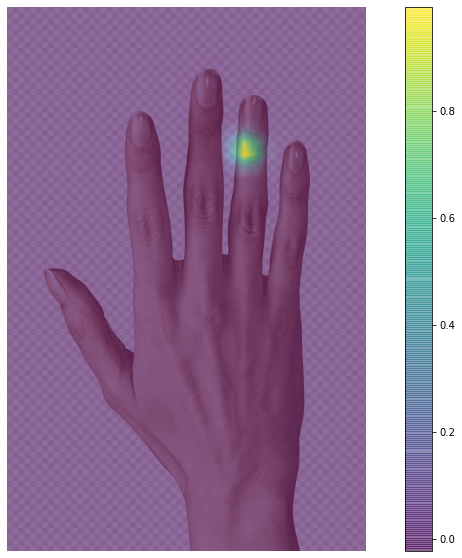

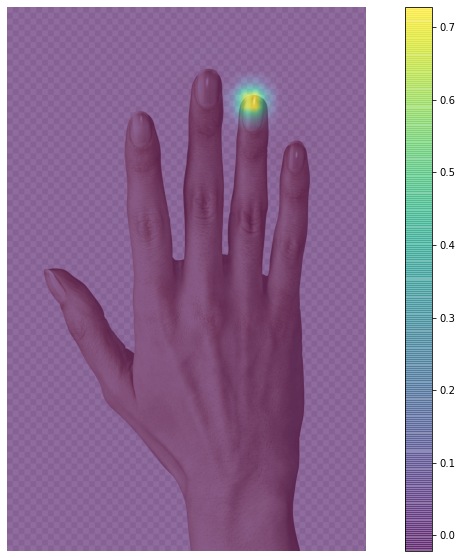

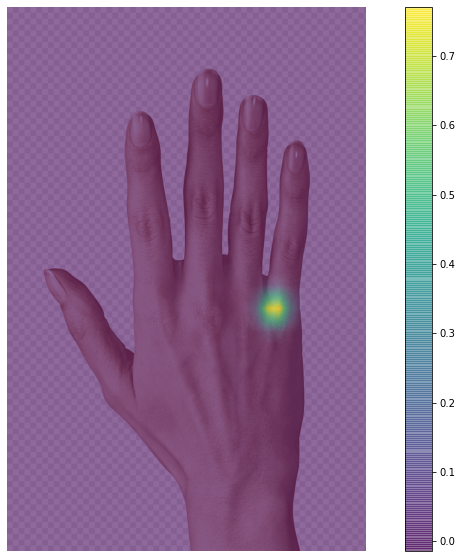

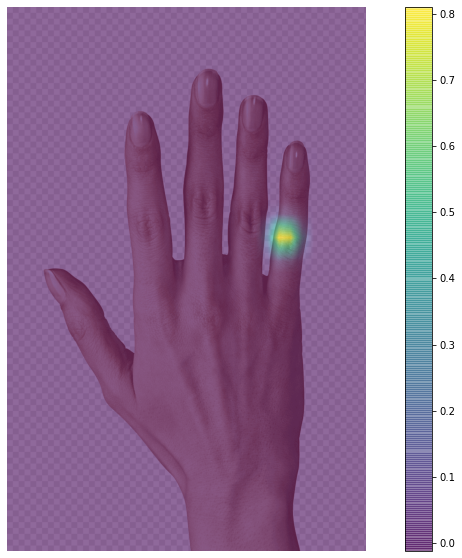

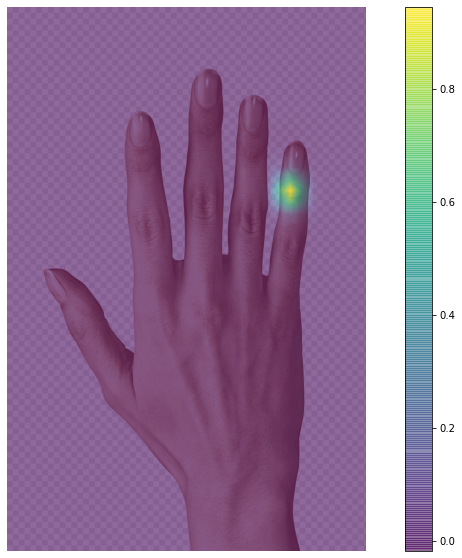

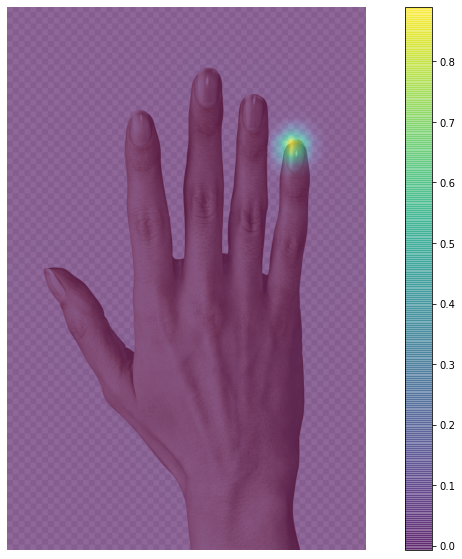

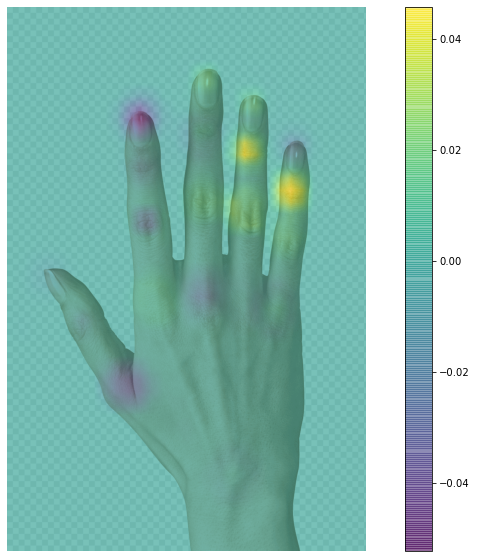

In [19]:
%%time

for i in range(22):
    probMap = output[0, i, :, :]
    print(probMap)
    probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
    plt.figure(figsize=[14,10])
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.imshow(probMap, alpha=0.6)
    plt.colorbar()
    plt.axis("off")

In [9]:
points = []

for i in [13, 14]:
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))
#     print(cv2.minMaxLoc(probMap))
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    print(prob)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 255, 255), thickness=4, lineType=cv2.FILLED)
#         cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
        plt.figure(figsize=[14,10])
        plt.imshow(frameCopy)
    
    else :
        points.append(None)
#         plt.imshow(frameCopy)
#         cv2.imshow('Output-Keypoints', frameCopy)
plt.clf()      

0.022785020992159843
0.5719321966171265


<Figure size 1008x720 with 0 Axes>

0.7220550179481506
0.857248842716217


<Figure size 432x288 with 0 Axes>

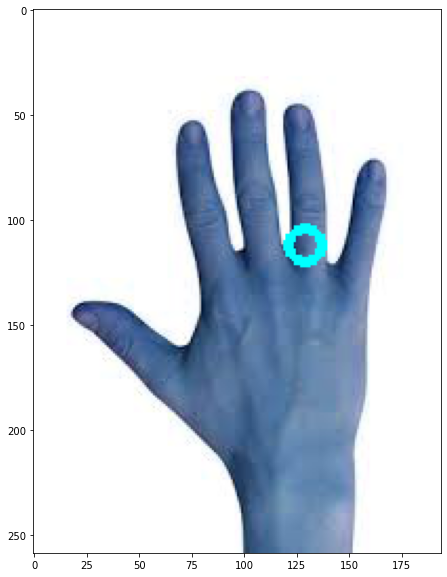

In [28]:
frame = cv2.imread("hand.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.1

t = time.time()
# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()

points = []

for i in [13, 14]:
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))
#     print(cv2.minMaxLoc(probMap))
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    print(prob)

    if prob > threshold :
#         cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 255, 255), thickness=4, lineType=cv2.FILLED)
#         cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
#         plt.figure(figsize=[14,10])
#         plt.imshow(frameCopy)
    
    else :
        points.append(None)
cv2.circle(frameCopy, (int((points[0][0]+points[1][0])/2), int((points[1][1]+points[0][1])/2)), 8, (0, 255, 255), thickness=4, lineType=cv2.FILLED)

plt.clf()
fig,ax = plt.subplots(figsize=(14,10))
fig.clear()
plt.imshow(frameCopy)

(1, 22, 46, 31)
(92, 31)


(-0.5, 919.5, 1393.5, -0.5)

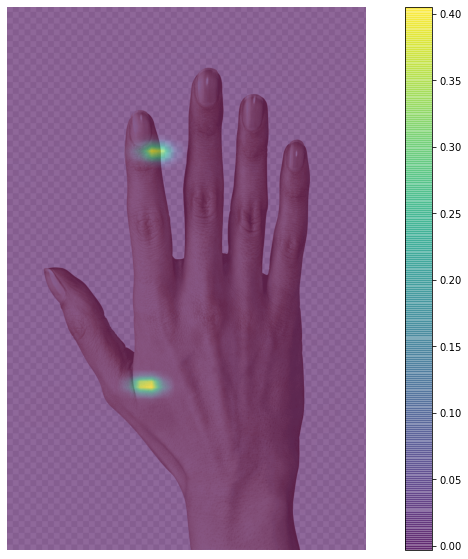

In [77]:
# print(type(output[0, 13, :, :]))
print(output.shape)
# probMap = (output[0, 5, :, :]+ output[0, 6, :, :]/2+output[0, 7, :, :])
probMap = np.concatenate((output[0, 5, :, :], output[0, 6, :, :]), axis = 0)
probMap /= 2
probMap2 = output[0, 6, :, :]
print(probMap.shape)
probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

In [43]:
a = np.random.randn(1, 4, 4, 4).astype("int")
a

array([[[[ 0, -3, -1,  0],
         [ 0,  0,  0,  1],
         [ 0,  0,  0,  0],
         [ 0,  0,  0, -1]],

        [[ 0, -1, -1,  0],
         [ 1,  0,  0,  0],
         [ 0,  0,  1,  0],
         [ 0,  0, -2,  0]],

        [[ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  1],
         [ 0,  0,  1,  0]],

        [[ 0,  1,  2,  0],
         [ 0,  0,  0,  0],
         [ 1, -1,  0, -1],
         [ 0,  0,  0,  0]]]])

In [45]:
b = np.random.randn(1, 4, 4, 4).astype("int")
b

array([[[[ 0,  0,  1,  0],
         [ 0,  0, -1,  0],
         [-2,  0,  0, -1],
         [ 0,  0,  1,  0]],

        [[ 0, -1,  0,  0],
         [ 0,  0,  0,  0],
         [ 1,  0,  0,  0],
         [ 0,  0,  0,  1]],

        [[ 0,  0,  1,  1],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 1,  0,  0,  0]],

        [[ 0, -1,  0,  0],
         [ 0, -1,  1,  0],
         [ 0,  1,  0,  0],
         [ 0, -1, -1,  0]]]])

In [49]:
c = a[0, 3, :, :]+b[0, 3, :, :]
c/2

array([[ 0. ,  0. ,  1. ,  0. ],
       [ 0. , -0.5,  0.5,  0. ],
       [ 0.5,  0. ,  0. , -0.5],
       [ 0. , -0.5, -0.5,  0. ]])

In [47]:
a[0, 3, :, :]

array([[ 0,  1,  2,  0],
       [ 0,  0,  0,  0],
       [ 1, -1,  0, -1],
       [ 0,  0,  0,  0]])

In [48]:
b[0, 3, :, :]

array([[ 0, -1,  0,  0],
       [ 0, -1,  1,  0],
       [ 0,  1,  0,  0],
       [ 0, -1, -1,  0]])